### **Introduction: Loading images from a directory**

In [34]:
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np

Found 1600 images belonging to 2 classes.


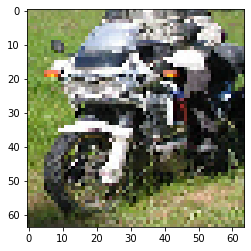

In [35]:
data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images'
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Xbatch, Ybatch = train_generator.next()
plt.imshow(Xbatch[10]);

In [36]:
data_gen_val = ImageDataGenerator(rescale=1.0/255)

val_generator = data_gen_val.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

X_val, Y_val = val_generator.next()

Found 576 images belonging to 2 classes.


### **Part 1 - Training a convolutional neural network**

In [37]:

def make_convnet(img_size):
    
    img_width = img_size
    img_height = img_size
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                    activation='relu',
                    input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    
    return model

In [38]:
model = make_convnet(img_size)

fitted_model = model.fit(train_generator, epochs=30, verbose=1, validation_data=val_generator);

Epoch 1/30
50/50 [==============================] - 6s 120ms/step - loss: 0.6637 - accuracy: 0.6137 - val_loss: 0.7011 - val_accuracy: 0.6042
Epoch 2/30
50/50 [==============================] - 5s 107ms/step - loss: 0.5387 - accuracy: 0.7412 - val_loss: 0.5943 - val_accuracy: 0.7326
Epoch 3/30
50/50 [==============================] - 5s 103ms/step - loss: 0.4727 - accuracy: 0.7856 - val_loss: 0.5148 - val_accuracy: 0.7656
Epoch 4/30
50/50 [==============================] - 5s 95ms/step - loss: 0.4373 - accuracy: 0.8012 - val_loss: 0.5941 - val_accuracy: 0.7292
Epoch 5/30
50/50 [==============================] - 5s 94ms/step - loss: 0.3926 - accuracy: 0.8263 - val_loss: 0.5240 - val_accuracy: 0.7378
Epoch 6/30
50/50 [==============================] - 5s 94ms/step - loss: 0.3606 - accuracy: 0.8450 - val_loss: 0.5977 - val_accuracy: 0.7240
Epoch 7/30
50/50 [==============================] - 5s 95ms/step - loss: 0.3010 - accuracy: 0.8719 - val_loss: 0.6329 - val_accuracy: 0.7326
Epoch 8/30

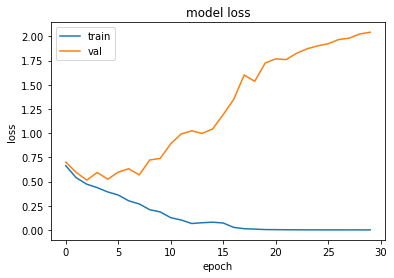

In [39]:
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

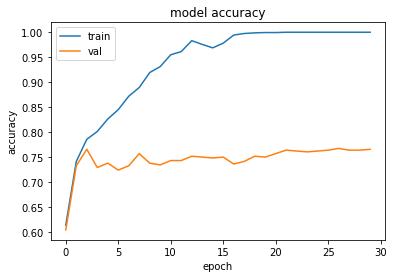

In [40]:
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Part 2 - Data Augmentation**

In [41]:
data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.1,
    brightness_range=[0.4, 1.2])

imgdir = 'a5_images'
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)
    
Xbatch, Ybatch = train_generator.next()

Found 1600 images belonging to 2 classes.


In [42]:
model = make_convnet(img_size)

fitted_model = model.fit(train_generator, batch_size=32, epochs=30, verbose=1, validation_data=val_generator);

Epoch 1/30
50/50 [==============================] - 7s 137ms/step - loss: 0.6841 - accuracy: 0.5694 - val_loss: 0.6507 - val_accuracy: 0.6632
Epoch 2/30
50/50 [==============================] - 6s 119ms/step - loss: 0.6631 - accuracy: 0.6169 - val_loss: 0.6708 - val_accuracy: 0.5833
Epoch 3/30
50/50 [==============================] - 6s 125ms/step - loss: 0.6061 - accuracy: 0.6825 - val_loss: 0.6817 - val_accuracy: 0.6424
Epoch 4/30
50/50 [==============================] - 6s 118ms/step - loss: 0.5853 - accuracy: 0.6881 - val_loss: 0.5865 - val_accuracy: 0.6892
Epoch 5/30
50/50 [==============================] - 6s 123ms/step - loss: 0.5488 - accuracy: 0.7287 - val_loss: 0.5812 - val_accuracy: 0.7344
Epoch 6/30
50/50 [==============================] - 6s 120ms/step - loss: 0.5497 - accuracy: 0.7400 - val_loss: 0.5593 - val_accuracy: 0.7344
Epoch 7/30
50/50 [==============================] - 6s 120ms/step - loss: 0.5226 - accuracy: 0.7494 - val_loss: 0.7678 - val_accuracy: 0.6649
Epoch 

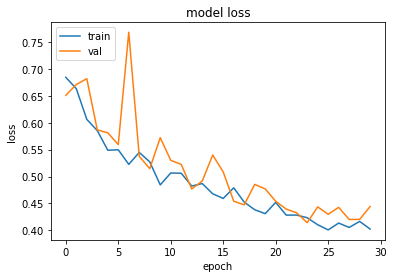

In [43]:
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

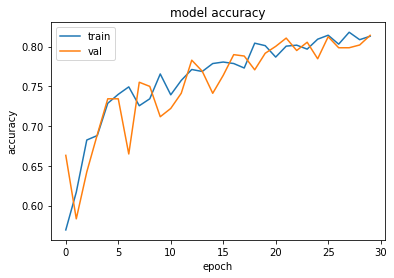

In [44]:
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Do you see an improvement on the validation set? Again, plot the losses and accuracies. Do you see any change?**\
Yes we see a slight improvement in the accuracy of the validation set, in part 1 we got an accuracy of approximately 0.79 and after the augmentation we get a validation accuracy of approximately 0.81. Looking at the plots, it seems like we avoid overfitting to some degree when using data augumentation. However, both the loss and the accuracies seem to vary a bit more (the curves are not as smooth as in part 1).  


### **Interlude: Applying a pre-trained convolutional neural network**

In [45]:
from keras import applications
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

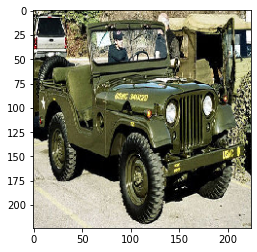

In [46]:
img_dir = './a5_images/train/car/0010.jpg'
loaded_img = load_img(img_dir, target_size=(224,224))
plt.imshow(loaded_img);

In [47]:
img_arr = img_to_array(loaded_img)
processed_img = preprocess_input(img_arr)

image = processed_img.reshape(1, 224, 224, 3)

result = decode_predictions(vggmodel.predict(image))
print(result)

1/1 [==============================] - 0s 488ms/step
[[('n03594945', 'jeep', 0.833972), ('n03478589', 'half_track', 0.11414835), ('n04461696', 'tow_truck', 0.02113805), ('n02701002', 'ambulance', 0.02090733), ('n04252225', 'snowplow', 0.0029148522)]]


**Does the prediction make sense?**\
Yes the prediction makes sense, the model predicts the image to be a jeep with a probability of 0.8. This is reasonable since the car in the image very much looks like a jeep.

### **Part 3: Using VGG-16 as a feature extractor**

In [48]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [49]:
def make_classifier(img_size):
    
    img_width = img_size
    img_height = img_size
    model = Sequential()
    model.add(Flatten())
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                    activation='relu',
                    input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    
    return model

In [50]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

def create_vgg16_features(dir, file_name):
    # make a generator that reads a given directory
    train_generator = vgg_data_gen.flow_from_directory(
        imgdir + dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)

    # apply the VGG-16 model to the generator
    cnn_features = feature_extractor.predict(train_generator)

    # save this NumPy array into a file
    with open(file_name, 'wb') as f:
        np.save(f, cnn_features)

def train_on_cnnfeatures(train_file, val_file):
    with open(train_file, 'rb') as f:
        X_train = np.load(f)

    with open(val_file, 'rb') as f:
        X_val = np.load(f)

    Y_train = get_labels(len(X_train))
    Y_val = get_labels(len(X_val))
    
    clf = keras.Sequential()
    clf.add(keras.layers.Flatten())
    clf.add(keras.layers.Dense(128, activation = 'relu'))
    clf.add(keras.layers.Dense(1, activation = 'sigmoid'))

    clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    fitted_clf = clf.fit(X_train, Y_train, validation_data=(X_val, Y_val), steps_per_epoch=30, epochs=30)

    return fitted_clf

In [51]:
train_dir = '/train'
val_dir = '/validation'
train_output = 'train_out'
val_output = 'val_out'

create_vgg16_features(train_dir, train_output)
create_vgg16_features(val_dir, val_output)

Found 1600 images belonging to 2 classes.
50/50 [==============================] - 33s 664ms/step
Found 576 images belonging to 2 classes.
18/18 [==============================] - 12s 647ms/step


In [52]:
clf = train_on_cnnfeatures(train_output, val_output)

Epoch 1/30
30/30 [==============================] - 0s 5ms/step - loss: 2.0183 - accuracy: 0.8475 - val_loss: 1.3479 - val_accuracy: 0.8455
Epoch 2/30
30/30 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9681 - val_loss: 1.1287 - val_accuracy: 0.8941
Epoch 3/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9900 - val_loss: 1.0331 - val_accuracy: 0.8872
Epoch 4/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.0059 - val_accuracy: 0.8854
Epoch 5/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.0215 - val_accuracy: 0.8854
Epoch 6/30
30/30 [==============================] - 0s 3ms/step - loss: 2.5594e-04 - accuracy: 1.0000 - val_loss: 1.0308 - val_accuracy: 0.8872
Epoch 7/30
30/30 [==============================] - 0s 3ms/step - loss: 1.9029e-04 - accuracy: 1.0000 - val_loss: 1.0292 - val_accuracy: 0.8872
Epoch 8/30
3

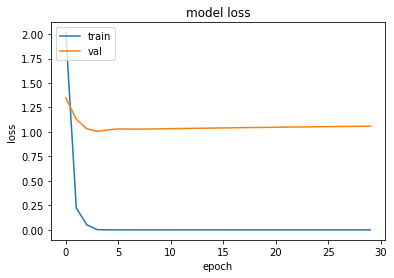

In [53]:
plt.plot(clf.history['loss'])
plt.plot(clf.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

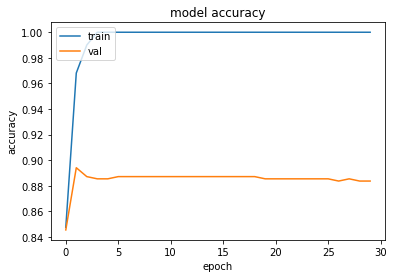

In [54]:
plt.plot(clf.history['accuracy'])
plt.plot(clf.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**What is your accuracy this time? If the accuracy is different from when you trained your previous CNN, what do you think is the reason for the difference?**\
We can observe some overfitting in this case as well, and this is likely due to the size of our dataset. However, we now get a higher accuracy of around 0.9. The reason that the accuracy is better could be that the VGG-16 has trained on a larger dataset, and that this knowledge is embedded in the model. The training time was a lot shorter using the VGG-16, and this is because we can use a simpler model. This means that we see to benefits of using the pretrained model, the accuracy is higher and the training time is shorter. 

### **Part 4: Visualizing the learned features**

In [55]:
weights = vggmodel.get_weights()[0]

def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

In [56]:
images_pos = []
images_neg = []

for i in range(10):
    pos_img = kernel_image(weights, i, True)
    images_pos.append(pos_img)
    neg_img = kernel_image(weights, i, False)
    images_neg.append(neg_img)

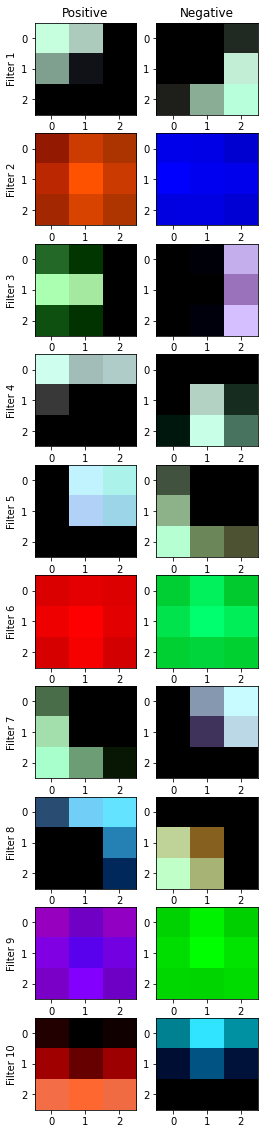

In [57]:
f, axarr = plt.subplots(10, 2, figsize=(4,20))

axarr[0, 0].set_title(f"Positive")
axarr[0, 1].set_title(f"Negative")

for i in range(10):
    img_pos = images_pos[i]
    img_neg = images_neg[i]
    axarr[i, 0].imshow(img_pos, aspect='auto')
    axarr[i, 1].imshow(img_neg,  aspect='auto')
    axarr[i, 0].set_ylabel(f"Filter {i+1}")

plt.show()
